## Content based model using Movies Keywords Dataset

Building a simple movie recommender system using movies keywords content dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
movies = pd.read_csv('data/movies_keywords.csv')

In [4]:
movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,keywords
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2057323,"wrongful-imprisonment,escape-from-prison,based..."
1,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2023734,"dc-comics,moral-dilemma,psychopath,clown,scarr..."
2,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,1802989,"dream,subconscious,ambiguous-ending,thief,psyc..."
3,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,1646400,"surprise-ending,fighting,multiple-personality-..."
4,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,1607874,"nonlinear-timeline,black-comedy,overdose,bonda..."


### Increase column width to see Keywords values properly

In [5]:
pd.set_option('max_colwidth', None)

In [6]:
movies.head(2)

tconst titleType              primaryTitle             originalTitle  \
0  tt0111161     movie  The Shawshank Redemption  The Shawshank Redemption   
1  tt0468569     movie           The Dark Knight           The Dark Knight   

   isAdult  startYear endYear  runtimeMinutes              genres  \
0        0       1994      \N             142               Drama   
1        0       2008      \N             152  Action,Crime,Drama   

   averageRating  numVotes  \
0            9.3   2057323   
1            9.0   2023734   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

### Analysis on Keywords Column

In [7]:
movies['keywords'].str.len()

0     4029
1     8187
2     4399
3     4626
4     5151
5     3452
6     3005
7     3678
8     5207
9     3417
10    7107
11    2816
12    2325
13    1550
14    4633
15    5345
16    6686
17    5130
18    2985
19    5084
Name: keywords, dtype: int64

Average keywords string length 

In [8]:

np.mean(movies['keywords'].str.len())

4440.6

Number of Keywords:

In [9]:
number_of_keywords = []
for keywords in movies['keywords']:
    n_keywords = len(keywords.split(','))
    number_of_keywords.append(n_keywords)


In [10]:
number_of_keywords

[305,
 634,
 340,
 355,
 378,
 242,
 256,
 284,
 448,
 247,
 566,
 231,
 180,
 109,
 418,
 384,
 521,
 343,
 220,
 359]

In [11]:
sum(number_of_keywords)

6820

## EDA & Plots

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

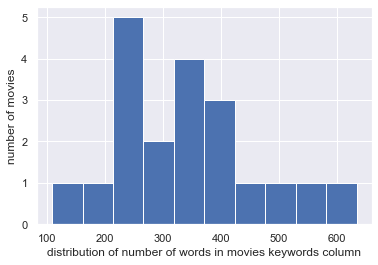

In [13]:

plt.hist(number_of_keywords)
plt.xlabel('distribution of number of words in movies keywords column')
plt.ylabel('number of movies')
plt.show()

Selected DF

In [14]:
movies = movies[['primaryTitle', 'keywords']]

In [15]:
movies.head()

primaryTitle  \
0  The Shawshank Redemption   
1           The Dark Knight   
2                 Inception   
3                Fight Club   
4              Pulp Fiction   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

### Create numpy array from keywords column

In [16]:
keywords_array = movies['keywords'].to_numpy()

In [17]:
keywords_array

array(["wrongful-imprisonment,escape-from-prison,based-on-the-works-of-stephen-king,prison,voice-over-narration,suicide-by-hanging,prison-cell-search,sexual-assault,infidelity,police-brutality,suicide,based-on-novella,suicide-of-villain,friendship-between-men,prison-yard,reference-to-rita-hayworth,tunneling-to-freedom,wrongful-conviction,prison-guard,life-imprisonment,imprisonment,tin-box,shower-room,voice-over-letter,trial,suicide-by-gunshot,suicide-of-friend,missing-prisoner,unfaithful-wife,solitary-confinement,plot-twist,surprise-ending,rita-hayworth-poster,prison-library,first-person-narration,parole-board,parole-hearing,banker,bromance,talking-to-a-bird,betting,watching-a-movie,biblical-quote,masterpiece,cheating-wife,panties,escape,redemption,not-guilty,chessboard,carving,basalt,reference-to-the-united-states-senate,baseball-team,loudspeaker,money-laundering,contraband,smuggler,portland-maine,regret,rehabilitated,caged-bird,reference-to-fort-hancock-texas,aria,tarring-roof,adding

In [18]:
keywords_array[0]

"wrongful-imprisonment,escape-from-prison,based-on-the-works-of-stephen-king,prison,voice-over-narration,suicide-by-hanging,prison-cell-search,sexual-assault,infidelity,police-brutality,suicide,based-on-novella,suicide-of-villain,friendship-between-men,prison-yard,reference-to-rita-hayworth,tunneling-to-freedom,wrongful-conviction,prison-guard,life-imprisonment,imprisonment,tin-box,shower-room,voice-over-letter,trial,suicide-by-gunshot,suicide-of-friend,missing-prisoner,unfaithful-wife,solitary-confinement,plot-twist,surprise-ending,rita-hayworth-poster,prison-library,first-person-narration,parole-board,parole-hearing,banker,bromance,talking-to-a-bird,betting,watching-a-movie,biblical-quote,masterpiece,cheating-wife,panties,escape,redemption,not-guilty,chessboard,carving,basalt,reference-to-the-united-states-senate,baseball-team,loudspeaker,money-laundering,contraband,smuggler,portland-maine,regret,rehabilitated,caged-bird,reference-to-fort-hancock-texas,aria,tarring-roof,adding-machin

In [19]:
type(keywords_array[0])

str

### Generate Words from Keywords Array by Splitting

In [20]:
words_list = []
for keyword in keywords_array:
    splitted_words = keyword.lower().split(',')
    words_list.append(splitted_words)
    

In [21]:
words_list

[['wrongful-imprisonment',
  'escape-from-prison',
  'based-on-the-works-of-stephen-king',
  'prison',
  'voice-over-narration',
  'suicide-by-hanging',
  'prison-cell-search',
  'sexual-assault',
  'infidelity',
  'police-brutality',
  'suicide',
  'based-on-novella',
  'suicide-of-villain',
  'friendship-between-men',
  'prison-yard',
  'reference-to-rita-hayworth',
  'tunneling-to-freedom',
  'wrongful-conviction',
  'prison-guard',
  'life-imprisonment',
  'imprisonment',
  'tin-box',
  'shower-room',
  'voice-over-letter',
  'trial',
  'suicide-by-gunshot',
  'suicide-of-friend',
  'missing-prisoner',
  'unfaithful-wife',
  'solitary-confinement',
  'plot-twist',
  'surprise-ending',
  'rita-hayworth-poster',
  'prison-library',
  'first-person-narration',
  'parole-board',
  'parole-hearing',
  'banker',
  'bromance',
  'talking-to-a-bird',
  'betting',
  'watching-a-movie',
  'biblical-quote',
  'masterpiece',
  'cheating-wife',
  'panties',
  'escape',
  'redemption',
  'not-gu

In [22]:
words_list[7]

['simulated-reality',
 'artificial-reality',
 'war-with-machines',
 'post-apocalypse',
 'questioning-reality',
 'computer-hacker',
 'hacker',
 'trilogy',
 'humanity-in-peril',
 'pill',
 'martial-arts',
 'programmer',
 'dystopia',
 'black-trenchcoat',
 'man-versus-machine',
 'one-against-many',
 'exploding-helicopter',
 'artificial-intelligence',
 'cyberpunk',
 'virtual-reality',
 'computer',
 'computer-program',
 'rebellion',
 'first-of-trilogy',
 'false-reality',
 'character-wearing-all-black',
 'telephone-booth',
 'slow-motion-scene',
 'code',
 'revolution',
 'government-agent',
 'prophecy',
 'kung-fu',
 'bullet-time',
 'title-spoken-by-character',
 'messiah',
 'truth',
 'christ-allegory',
 'future',
 'human-versus-machine',
 'mutism',
 'trenchcoat',
 'strong-female-lead',
 'collectivism',
 'freedom-fighter',
 'combat',
 'hand-to-hand-combat',
 'kiss',
 'fistfight',
 'tough-girl',
 'hero',
 'wearing-sunglasses-inside',
 'helicopter-crash',
 'jumping-between-buildings',
 'brain-in-a-v

In [23]:
len(words_list), len(words_list[0]), len(words_list[1])

(20, 305, 634)

## Create Dictionary

Install Gensim

In [24]:
#! pip install gensim

In [25]:
from gensim.corpora.dictionary import Dictionary

create a dictionary of words from words list

In [26]:
dictionary = Dictionary(words_list) 

In [27]:
dictionary

In [28]:
len(dictionary)

4155

#### Total number of words in the words_list

In [29]:
number_words = 0
for word in words_list:
    number_words = number_words + len(word)

In [30]:
number_words

6820

In [31]:
dictionary.get(0), dictionary.get(1), dictionary.get(100)

('abuse-of-power', 'accountant', 'illiteracy')

In [32]:
dictionary.get(1000)

'husband-murders-wife'

## Generate Bag of Words

In [33]:
words_list[0]

['wrongful-imprisonment',
 'escape-from-prison',
 'based-on-the-works-of-stephen-king',
 'prison',
 'voice-over-narration',
 'suicide-by-hanging',
 'prison-cell-search',
 'sexual-assault',
 'infidelity',
 'police-brutality',
 'suicide',
 'based-on-novella',
 'suicide-of-villain',
 'friendship-between-men',
 'prison-yard',
 'reference-to-rita-hayworth',
 'tunneling-to-freedom',
 'wrongful-conviction',
 'prison-guard',
 'life-imprisonment',
 'imprisonment',
 'tin-box',
 'shower-room',
 'voice-over-letter',
 'trial',
 'suicide-by-gunshot',
 'suicide-of-friend',
 'missing-prisoner',
 'unfaithful-wife',
 'solitary-confinement',
 'plot-twist',
 'surprise-ending',
 'rita-hayworth-poster',
 'prison-library',
 'first-person-narration',
 'parole-board',
 'parole-hearing',
 'banker',
 'bromance',
 'talking-to-a-bird',
 'betting',
 'watching-a-movie',
 'biblical-quote',
 'masterpiece',
 'cheating-wife',
 'panties',
 'escape',
 'redemption',
 'not-guilty',
 'chessboard',
 'carving',
 'basalt',
 're

doc2bow = Document to BOW[Bag of word]

In [34]:
bow = dictionary.doc2bow(words_list[0])

In [35]:
bow

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 1),
 (92, 1),
 (93, 1),
 (94, 1),
 (95, 1),
 (96, 1),
 (97, 1),
 (98, 1),
 (99, 1),
 (100, 1),

In [36]:
len(words_list[0]), len(bow)

(305, 305)

### Generate Corpus by creating BOW of each document

In [37]:

corpus = [dictionary.doc2bow(doc) for doc in words_list] 


In [38]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)

In [39]:
len(corpus), len(corpus[0]), len(corpus[1])

(20, 305, 634)

In [40]:
len(words_list), len(words_list[0])

(20, 305)

### TF-IDF Model

TF = Term frequency -> count/no.

IDF = Inverse doc freq. -> log(N/n)

In [41]:

from gensim.models.tfidfmodel import TfidfModel


create tfidf model of the corpus

In [42]:

tfidf = TfidfModel(corpus)

In [43]:
tfidf

In [44]:
tfidf[corpus[0]]

[(0, 0.064688705912396),
 (1, 0.04972114872676867),
 (2, 0.064688705912396),
 (3, 0.064688705912396),
 (4, 0.03475359154114133),
 (5, 0.064688705912396),
 (6, 0.064688705912396),
 (7, 0.064688705912396),
 (8, 0.064688705912396),
 (9, 0.064688705912396),
 (10, 0.064688705912396),
 (11, 0.064688705912396),
 (12, 0.064688705912396),
 (13, 0.04972114872676867),
 (14, 0.022669460576146442),
 (15, 0.019786034355513998),
 (16, 0.04096568904577719),
 (17, 0.064688705912396),
 (18, 0.009302162819152507),
 (19, 0.064688705912396),
 (20, 0.064688705912396),
 (21, 0.064688705912396),
 (22, 0.064688705912396),
 (23, 0.064688705912396),
 (24, 0.064688705912396),
 (25, 0.064688705912396),
 (26, 0.064688705912396),
 (27, 0.064688705912396),
 (28, 0.064688705912396),
 (29, 0.064688705912396),
 (30, 0.064688705912396),
 (31, 0.064688705912396),
 (32, 0.064688705912396),
 (33, 0.064688705912396),
 (34, 0.01724267217915838),
 (35, 0.04972114872676867),
 (36, 0.064688705912396),
 (37, 0.064688705912396),
 

## Generate Similarity Matrix

In [45]:
from gensim.similarities import MatrixSimilarity


In [46]:
sims = MatrixSimilarity(tfidf[corpus], num_features=len(dictionary))


In [47]:
print(sims)

MatrixSimilarity<20 docs, 4155 features>


In [48]:
sims[corpus[0]]

array([0.9651191 , 0.06275137, 0.02458787, 0.03256178, 0.02754298,
       0.01948299, 0.0249269 , 0.02200155, 0.01947675, 0.02430909,
       0.04750553, 0.02055916, 0.01754796, 0.0097544 , 0.0231042 ,
       0.02758888, 0.05892538, 0.01681061, 0.02736823, 0.0191056 ],
      dtype=float32)

In [49]:
len(sims[corpus[0]])

20

## Generate Recommendation for a movie: Batman Begins

In [50]:
movie_title = "Batman Begins"

#### n = no of recommendations

In [51]:
n = 5

#### Get the movie row

In [52]:
movie = movies.loc[movies.primaryTitle==movie_title] 

In [53]:
movie

primaryTitle  \
16  Batman Begins   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

#### Generate words_list by splitting the keywords column

In [54]:
words_list = movie['keywords'].iloc[0].split(',')

In [55]:
words_list

['social-decay',
 'well',
 'deception',
 'falling-down-a-well',
 'falling-into-a-well',
 'based-on-comic-book',
 'origin-of-hero',
 'superhero',
 'dc-comics',
 'gotham',
 'dark-past',
 'bruce-wayne-character',
 'batman-character',
 'alfred-pennyworth-character',
 'james-gordon-character',
 'lucius-fox-character',
 "ra's-al-ghul-character",
 'batcave',
 'gotham-city',
 'justice',
 'injustice',
 'bat-signal',
 'arkham-asylum',
 'scarecrow-character',
 'fear',
 'training',
 'mentor',
 'organized-crime',
 'playboy',
 'millionaire',
 'cave',
 'billionaire',
 'ninja',
 'mansion',
 'train-derailment',
 'fake-drunkenness',
 'manipulation',
 'gadget-vehicle',
 'homeless-man',
 'slum',
 'toxin',
 'home-invasion',
 'mob-hit',
 'vigilante-justice',
 'gangster',
 'mafia-boss',
 'police-corruption',
 'water-contamination',
 'action-hero',
 'stylized-violence',
 'elevated-train',
 'gas-mask',
 'hand-to-hand-combat',
 'masked-vigilante',
 'reboot-of-series',
 'flashback',
 'vigilantism',
 'urban-decay

#### set the query_doc to the words_list

In [56]:
query_doc = words_list 

In [57]:
query_doc

['social-decay',
 'well',
 'deception',
 'falling-down-a-well',
 'falling-into-a-well',
 'based-on-comic-book',
 'origin-of-hero',
 'superhero',
 'dc-comics',
 'gotham',
 'dark-past',
 'bruce-wayne-character',
 'batman-character',
 'alfred-pennyworth-character',
 'james-gordon-character',
 'lucius-fox-character',
 "ra's-al-ghul-character",
 'batcave',
 'gotham-city',
 'justice',
 'injustice',
 'bat-signal',
 'arkham-asylum',
 'scarecrow-character',
 'fear',
 'training',
 'mentor',
 'organized-crime',
 'playboy',
 'millionaire',
 'cave',
 'billionaire',
 'ninja',
 'mansion',
 'train-derailment',
 'fake-drunkenness',
 'manipulation',
 'gadget-vehicle',
 'homeless-man',
 'slum',
 'toxin',
 'home-invasion',
 'mob-hit',
 'vigilante-justice',
 'gangster',
 'mafia-boss',
 'police-corruption',
 'water-contamination',
 'action-hero',
 'stylized-violence',
 'elevated-train',
 'gas-mask',
 'hand-to-hand-combat',
 'masked-vigilante',
 'reboot-of-series',
 'flashback',
 'vigilantism',
 'urban-decay

#### get bag of words from the query_doc

In [58]:
query_doc_bow = dictionary.doc2bow(query_doc) 

In [59]:
query_doc_bow

[(14, 1),
 (15, 1),
 (18, 1),
 (34, 1),
 (52, 1),
 (53, 1),
 (55, 1),
 (56, 1),
 (64, 1),
 (67, 1),
 (70, 1),
 (76, 1),
 (91, 1),
 (96, 1),
 (99, 1),
 (109, 1),
 (134, 1),
 (140, 1),
 (143, 1),
 (144, 1),
 (149, 1),
 (163, 1),
 (170, 1),
 (173, 1),
 (178, 1),
 (184, 1),
 (187, 1),
 (189, 1),
 (194, 1),
 (219, 1),
 (222, 1),
 (223, 1),
 (226, 1),
 (242, 1),
 (251, 1),
 (255, 1),
 (261, 1),
 (273, 1),
 (281, 1),
 (288, 1),
 (291, 1),
 (306, 1),
 (310, 1),
 (311, 1),
 (312, 1),
 (313, 1),
 (314, 1),
 (316, 1),
 (319, 1),
 (321, 1),
 (322, 1),
 (324, 1),
 (325, 1),
 (327, 1),
 (329, 1),
 (330, 1),
 (342, 1),
 (345, 1),
 (346, 1),
 (348, 1),
 (350, 1),
 (352, 1),
 (354, 1),
 (361, 1),
 (367, 1),
 (368, 1),
 (373, 1),
 (376, 1),
 (379, 1),
 (388, 1),
 (390, 1),
 (391, 1),
 (392, 1),
 (394, 1),
 (395, 1),
 (403, 1),
 (404, 1),
 (406, 1),
 (407, 1),
 (409, 1),
 (411, 1),
 (412, 1),
 (417, 1),
 (428, 1),
 (431, 1),
 (433, 1),
 (434, 1),
 (436, 1),
 (437, 1),
 (440, 1),
 (441, 1),
 (442, 1),
 (4

In [60]:
len(query_doc_bow), len(query_doc)

(521, 521)

### Generate TF-IDF values for the query_doc_bow

In [61]:
query_doc_tfidf = tfidf[query_doc_bow] 

In [62]:
query_doc_tfidf

[(14, 0.021478502423832136),
 (15, 0.01874655929440621),
 (18, 0.008813466292545171),
 (34, 0.01633681467405922),
 (52, 0.021478502423832136),
 (53, 0.04710900860902427),
 (55, 0.010451074655578202),
 (56, 0.028362449314618055),
 (64, 0.007297277766523107),
 (67, 0.01633681467405922),
 (70, 0.021478502423832136),
 (76, 0.007297277766523107),
 (91, 0.021478502423832136),
 (96, 0.01633681467405922),
 (99, 0.02463229931288723),
 (109, 0.028362449314618055),
 (134, 0.03881352397019625),
 (140, 0.010451074655578202),
 (143, 0.03292778395171524),
 (144, 0.03292778395171524),
 (149, 0.04710900860902427),
 (163, 0.03292778395171524),
 (170, 0.03881352397019625),
 (173, 0.03881352397019625),
 (178, 0.02463229931288723),
 (184, 0.03292778395171524),
 (187, 0.021478502423832136),
 (189, 0.03292778395171524),
 (194, 0.01633681467405922),
 (219, 0.04710900860902427),
 (222, 0.012231256295839573),
 (223, 0.02463229931288723),
 (226, 0.028362449314618055),
 (242, 0.012231256295839573),
 (251, 0.04710

### Get Similarity Score using Similarity Matrix

In [63]:
similarity_array = sims[query_doc_tfidf] 

In [64]:
similarity_array

array([0.0330345 , 0.23067485, 0.09241162, 0.03023943, 0.03647279,
       0.01943753, 0.02756399, 0.03419387, 0.0328058 , 0.05635343,
       0.20504089, 0.03340784, 0.0457322 , 0.02569168, 0.02935131,
       0.02992339, 1.        , 0.05465941, 0.04497503, 0.02149241],
      dtype=float32)

In [65]:
len(similarity_array)

20

### Create a Series to Visualize Similarity Score along with Movie Names

In [66]:
similarity_series = pd.Series(similarity_array.tolist(), index=movies.primaryTitle.values)

In [67]:
similarity_series

The Shawshank Redemption                             0.033034
The Dark Knight                                      0.230675
Inception                                            0.092412
Fight Club                                           0.030239
Pulp Fiction                                         0.036473
Forrest Gump                                         0.019438
The Lord of the Rings: The Fellowship of the Ring    0.027564
The Matrix                                           0.034194
The Lord of the Rings: The Return of the King        0.032806
The Godfather                                        0.056353
The Dark Knight Rises                                0.205041
The Lord of the Rings: The Two Towers                0.033408
Interstellar                                         0.045732
Se7en                                                0.025692
Gladiator                                            0.029351
Django Unchained                                     0.029923
Batman B

### Sort the series to get Top Recommended Movies

In [68]:

recommended_movies = similarity_series.sort_values(ascending=False)[1:n+1] 



In [69]:
recommended_movies

The Dark Knight          0.230675
The Dark Knight Rises    0.205041
Inception                0.092412
The Godfather            0.056353
The Avengers             0.054659
dtype: float64

## Get highest TF-IDF values words for this movie which influenced the Recommendations

In [70]:
movie

primaryTitle  \
16  Batman Begins   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### Corpus for 16th index

In [71]:
corpus[16]

[(14, 1),
 (15, 1),
 (18, 1),
 (34, 1),
 (52, 1),
 (53, 1),
 (55, 1),
 (56, 1),
 (64, 1),
 (67, 1),
 (70, 1),
 (76, 1),
 (91, 1),
 (96, 1),
 (99, 1),
 (109, 1),
 (134, 1),
 (140, 1),
 (143, 1),
 (144, 1),
 (149, 1),
 (163, 1),
 (170, 1),
 (173, 1),
 (178, 1),
 (184, 1),
 (187, 1),
 (189, 1),
 (194, 1),
 (219, 1),
 (222, 1),
 (223, 1),
 (226, 1),
 (242, 1),
 (251, 1),
 (255, 1),
 (261, 1),
 (273, 1),
 (281, 1),
 (288, 1),
 (291, 1),
 (306, 1),
 (310, 1),
 (311, 1),
 (312, 1),
 (313, 1),
 (314, 1),
 (316, 1),
 (319, 1),
 (321, 1),
 (322, 1),
 (324, 1),
 (325, 1),
 (327, 1),
 (329, 1),
 (330, 1),
 (342, 1),
 (345, 1),
 (346, 1),
 (348, 1),
 (350, 1),
 (352, 1),
 (354, 1),
 (361, 1),
 (367, 1),
 (368, 1),
 (373, 1),
 (376, 1),
 (379, 1),
 (388, 1),
 (390, 1),
 (391, 1),
 (392, 1),
 (394, 1),
 (395, 1),
 (403, 1),
 (404, 1),
 (406, 1),
 (407, 1),
 (409, 1),
 (411, 1),
 (412, 1),
 (417, 1),
 (428, 1),
 (431, 1),
 (433, 1),
 (434, 1),
 (436, 1),
 (437, 1),
 (440, 1),
 (441, 1),
 (442, 1),
 (4

In [72]:
corpus[movie.index.values.tolist()[0]]

[(14, 1),
 (15, 1),
 (18, 1),
 (34, 1),
 (52, 1),
 (53, 1),
 (55, 1),
 (56, 1),
 (64, 1),
 (67, 1),
 (70, 1),
 (76, 1),
 (91, 1),
 (96, 1),
 (99, 1),
 (109, 1),
 (134, 1),
 (140, 1),
 (143, 1),
 (144, 1),
 (149, 1),
 (163, 1),
 (170, 1),
 (173, 1),
 (178, 1),
 (184, 1),
 (187, 1),
 (189, 1),
 (194, 1),
 (219, 1),
 (222, 1),
 (223, 1),
 (226, 1),
 (242, 1),
 (251, 1),
 (255, 1),
 (261, 1),
 (273, 1),
 (281, 1),
 (288, 1),
 (291, 1),
 (306, 1),
 (310, 1),
 (311, 1),
 (312, 1),
 (313, 1),
 (314, 1),
 (316, 1),
 (319, 1),
 (321, 1),
 (322, 1),
 (324, 1),
 (325, 1),
 (327, 1),
 (329, 1),
 (330, 1),
 (342, 1),
 (345, 1),
 (346, 1),
 (348, 1),
 (350, 1),
 (352, 1),
 (354, 1),
 (361, 1),
 (367, 1),
 (368, 1),
 (373, 1),
 (376, 1),
 (379, 1),
 (388, 1),
 (390, 1),
 (391, 1),
 (392, 1),
 (394, 1),
 (395, 1),
 (403, 1),
 (404, 1),
 (406, 1),
 (407, 1),
 (409, 1),
 (411, 1),
 (412, 1),
 (417, 1),
 (428, 1),
 (431, 1),
 (433, 1),
 (434, 1),
 (436, 1),
 (437, 1),
 (440, 1),
 (441, 1),
 (442, 1),
 (4

### TF-IDF Values

In [73]:
tfidf[corpus[movie.index.values.tolist()[0]]]

[(14, 0.021478502423832136),
 (15, 0.01874655929440621),
 (18, 0.008813466292545171),
 (34, 0.01633681467405922),
 (52, 0.021478502423832136),
 (53, 0.04710900860902427),
 (55, 0.010451074655578202),
 (56, 0.028362449314618055),
 (64, 0.007297277766523107),
 (67, 0.01633681467405922),
 (70, 0.021478502423832136),
 (76, 0.007297277766523107),
 (91, 0.021478502423832136),
 (96, 0.01633681467405922),
 (99, 0.02463229931288723),
 (109, 0.028362449314618055),
 (134, 0.03881352397019625),
 (140, 0.010451074655578202),
 (143, 0.03292778395171524),
 (144, 0.03292778395171524),
 (149, 0.04710900860902427),
 (163, 0.03292778395171524),
 (170, 0.03881352397019625),
 (173, 0.03881352397019625),
 (178, 0.02463229931288723),
 (184, 0.03292778395171524),
 (187, 0.021478502423832136),
 (189, 0.03292778395171524),
 (194, 0.01633681467405922),
 (219, 0.04710900860902427),
 (222, 0.012231256295839573),
 (223, 0.02463229931288723),
 (226, 0.028362449314618055),
 (242, 0.012231256295839573),
 (251, 0.04710

### Sorted TF-IDF values

In [74]:

sorted_tfidf_weights = sorted(tfidf[corpus[movie.index.values.tolist()[0]]], key=lambda w: w[1], reverse=True)


In [75]:
sorted_tfidf_weights

[(3515, 0.061290233266333295),
 (3516, 0.061290233266333295),
 (3517, 0.061290233266333295),
 (3518, 0.061290233266333295),
 (3519, 0.061290233266333295),
 (3520, 0.061290233266333295),
 (3521, 0.061290233266333295),
 (3522, 0.061290233266333295),
 (3523, 0.061290233266333295),
 (3524, 0.061290233266333295),
 (3526, 0.061290233266333295),
 (3527, 0.061290233266333295),
 (3528, 0.061290233266333295),
 (3529, 0.061290233266333295),
 (3530, 0.061290233266333295),
 (3531, 0.061290233266333295),
 (3532, 0.061290233266333295),
 (3533, 0.061290233266333295),
 (3534, 0.061290233266333295),
 (3535, 0.061290233266333295),
 (3536, 0.061290233266333295),
 (3537, 0.061290233266333295),
 (3538, 0.061290233266333295),
 (3539, 0.061290233266333295),
 (3540, 0.061290233266333295),
 (3541, 0.061290233266333295),
 (3542, 0.061290233266333295),
 (3543, 0.061290233266333295),
 (3544, 0.061290233266333295),
 (3545, 0.061290233266333295),
 (3546, 0.061290233266333295),
 (3547, 0.061290233266333295),
 (3548, 

In [76]:
dictionary.get(3515)

'1980s'

In [77]:
dictionary.get(3534)

'board-meeting'

In [78]:
print('Top words associated with this movie by tf-idf are: ')
for term_id, weight in sorted_tfidf_weights[:5]:
    print(" '%s' %.5f" %(dictionary.get(term_id), weight))



Top words associated with this movie by tf-idf are: 
 '1980s' 0.06129
 '20th-century' 0.06129
 '21st-century' 0.06129
 'action-violence' 0.06129
 'africa' 0.06129


# Creating a Modular code by creating a function for Query Movie Input

In [79]:
def movie_recommendation(movie_title, number_of_hits=5):
    movie = movies.loc[movies.primaryTitle==movie_title] # get the movie row
    keywords = movie['keywords'].iloc[0].split(',') #get the keywords as a Series (movie['keywords']),
    # get just the keywords string ([0]), and then convert to a list of keywords (.split(',') )
    query_doc = keywords #set the query_doc to the list of keywords
    
    query_doc_bow = dictionary.doc2bow(query_doc) # get a bag of words from the query_doc
    query_doc_tfidf = tfidf[query_doc_bow] #convert the regular bag of words model to a tf-idf model where we have tuples
    # of the movie ID and it's tf-idf value for the movie

    similarity_array = sims[query_doc_tfidf] # get the array of similarity values between our movie and every other movie. 
    #So the length is the number of movies we have. To do this, we pass our list of tf-idf tuples to sims.

    similarity_series = pd.Series(similarity_array.tolist(), index=movies.primaryTitle.values) #Convert to a Series
    recommended_movies = similarity_series.sort_values(ascending=False)[1:number_of_hits+1] 
    #get the top matching results, i.e. most similar movies; start from index 1 because every movie is most similar to itself
    print("Top Recommended Movies along with Similarity Score: ")
    print(recommended_movies)

In [80]:
movie_recommendation('Interstellar', 5)

Top Recommended Movies along with Similarity Score: 
Inception                0.054903
Batman Begins            0.045732
The Dark Knight Rises    0.044323
The Avengers             0.041505
Star Wars                0.040667
dtype: float64


In [81]:
movie_recommendation('Batman Begins', 5)

Top Recommended Movies along with Similarity Score: 
The Dark Knight          0.230675
The Dark Knight Rises    0.205041
Inception                0.092412
The Godfather            0.056353
The Avengers             0.054659
dtype: float64


In [82]:
movie_recommendation('The Lord of the Rings: The Two Towers', 5)

Top Recommended Movies along with Similarity Score: 
The Lord of the Rings: The Fellowship of the Ring    0.254642
The Lord of the Rings: The Return of the King        0.247301
Gladiator                                            0.054897
Star Wars                                            0.035661
The Dark Knight Rises                                0.034676
dtype: float64
